In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Attention
from tensorflow.keras.callbacks import EarlyStopping
!pip install tensorflow transformers scikit-learn numpy pandas matplotlib seaborn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df = pd.read_csv('FinalSentiment.csv')

In [25]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):  
        text = str(text)  
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    return ' '.join(tokens)

df['cleaned_text'] = df['statement'].apply(preprocess_text)

df[['statement', 'cleaned_text']].head()

,statement,cleaned_text
0,does anyone know? ..how to check the network c...,anyone know check network concerned celcom
1,mm twitter appears to have eaten some of my po...,mm twitter appears eaten post naughty twitter
2,we never have to call the police about anything.,never call police anything
3,my primary concern is to get her the surgery a...,primary concern get surgery treatment needs sa...
4,ich kann nicht mehr... ich will nicht mehr...i...,ich kann nicht mehr ich nicht mehrich kann wed...


In [26]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])

# Clip large indices
X = [[min(word_index, 4999) for word_index in sequence] for sequence in X]

X = pad_sequences(X, padding='post', maxlen=130)  

y = pd.get_dummies(df['status']).values

# **LSTM**

In [68]:
# Data Preprocessing
X = df['statement'].astype(str).values  # Text data
y = pd.get_dummies(df['status']).values  # Convert 'status' to one-hot encoding

# Tokenization & Padding
max_words = 5000
max_length = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [74]:
from tensorflow.keras.layers import LSTM

def build_lstm_model(input_length, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64, input_length=input_length))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize & Train Model
num_classes = y.shape[1]
lstm_model = build_lstm_model(max_length, num_classes)
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

Epoch 1/20


C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.4627 - loss: 1.4973 - val_accuracy: 0.5491 - val_loss: 1.2077
Epoch 2/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.5413 - loss: 1.1761 - val_accuracy: 0.5122 - val_loss: 1.3054
Epoch 3/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.5361 - loss: 1.1952 - val_accuracy: 0.5313 - val_loss: 1.0678
Epoch 4/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.5567 - loss: 1.0310 - val_accuracy: 0.5651 - val_loss: 1.0476
Epoch 5/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.5880 - loss: 0.9755 - val_accuracy: 0.5869 - val_loss: 0.9199
Epoch 6/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.6006 - loss: 0.9365 - val_accuracy: 0.6046 - val_loss: 0.8870
Epoch 7/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.6248 - loss: 0.8488 - val_accuracy: 0.6295 - val_loss: 0.8676
Epoch 8/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.6535 - loss: 0.7890 - val_accurac

In [88]:
print("Evaluating LSTM model...")
lstm_eval = lstm_model.evaluate(X_train, y_train)

print(f"LSTM model accuracy: {lstm_eval[1]}")

Evaluating LSTM model...
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9228 - loss: 0.2492
LSTM model accuracy: 0.9213312864303589


In [90]:
# 1. Can the model differentiate between normal, depressive, and suicidal statements?
status_labels = df['status'].unique()
status_mapping = {label: idx for idx, label in enumerate(status_labels)}
y_test_labels = [status_labels[idx] for idx in y_test_classes]
y_pred_labels = [status_labels[idx] for idx in y_pred_classes]

print("\nModel's Ability to Differentiate Mental Health Status:")
for label in status_labels:
    correct = sum((np.array(y_test_labels) == label) & (np.array(y_pred_labels) == label))
    total = sum(np.array(y_test_labels) == label)
    accuracy = correct / total if total > 0 else 0
    print(f"Accuracy for {label}: {accuracy:.2f}")


Model's Ability to Differentiate Mental Health Status:
Accuracy for normal: 0.76
Accuracy for suicidal: 0.75
Accuracy for anxiety: 0.68
Accuracy for depression: 0.92
Accuracy for personality disorder: 0.33
Accuracy for bipolar: 0.48
Accuracy for stress: 0.67


In [92]:
# 2. Performance in predicting Mental_Illness_Category
df['Mental_Illness_Category'] = df['Mental_Illness_Category'].astype(str)
category_labels = df['Mental_Illness_Category'].unique()
y_test_categories = df.iloc[y_test_classes]['Mental_Illness_Category'].values
y_pred_categories = df.iloc[y_pred_classes]['Mental_Illness_Category'].values
print("\nMental Illness Category Prediction Accuracy:")
print(classification_report(y_test_categories, y_pred_categories))


Mental Illness Category Prediction Accuracy:
                     precision    recall  f1-score   support

No Previous Illness       0.91      0.89      0.90      4163
              Other       0.52      0.48      0.50       419
  Substance-Related       0.91      0.94      0.92      4672

           accuracy                           0.90      9254
          macro avg       0.78      0.77      0.77      9254
       weighted avg       0.89      0.90      0.89      9254



In [114]:
# 3. Correlation between sentiment score and predicted category
status_labels = df['status'].unique()
status_mapping = {label: idx for idx, label in enumerate(status_labels)}
df['status_encoded'] = df['status'].map(status_mapping)
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')  # Ensure numeric
df['status_encoded'] = pd.to_numeric(df['status_encoded'], errors='coerce')
correlation = df[['sentiment_score', 'status_encoded']].corr()
print("\nSentiment Score Correlation:")
print(correlation)


Sentiment Score Correlation:
                 sentiment_score  status_encoded
sentiment_score         1.000000        0.000222
status_encoded          0.000222        1.000000


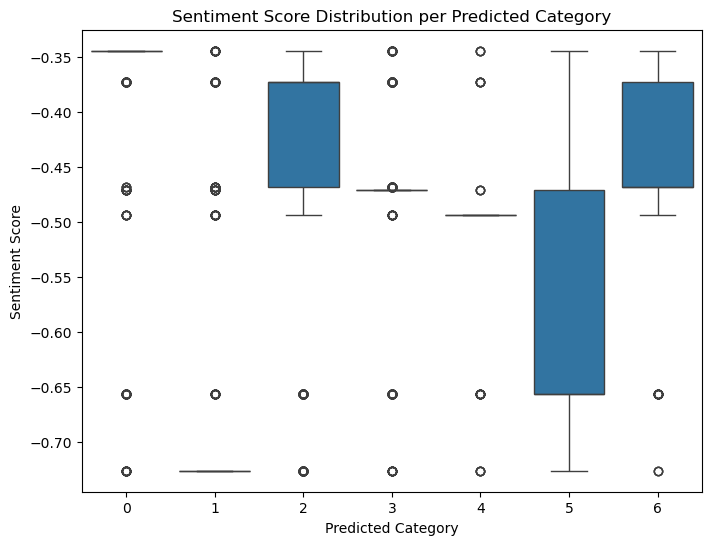

In [96]:
# 4. Prediction alignment with sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_pred_classes, y=df.iloc[y_test_classes]['sentiment_score'])
plt.xlabel("Predicted Category")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Distribution per Predicted Category")
plt.show()

In [116]:
# 5. Detecting negative emotions
negative_mask = df.iloc[y_test_classes]['sentiment_score'] < 0
detected_negative = y_pred_classes[negative_mask]
print("\nNegative Emotion Detection Accuracy:", np.mean(detected_negative == y_test_classes[negative_mask]))


Negative Emotion Detection Accuracy: 0.7442187162308191


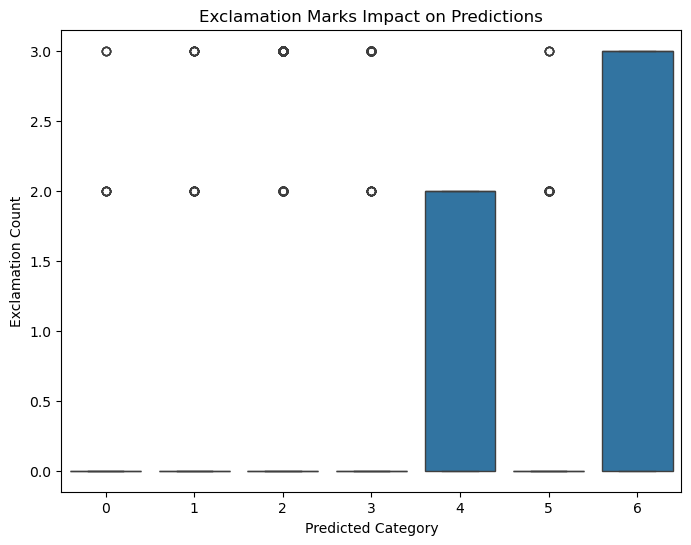

In [100]:
# 6. Influence of exclamation marks
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_pred_classes, y=df.iloc[y_test_classes]['exclamation_count'])
plt.xlabel("Predicted Category")
plt.ylabel("Exclamation Count")
plt.title("Exclamation Marks Impact on Predictions")
plt.show()

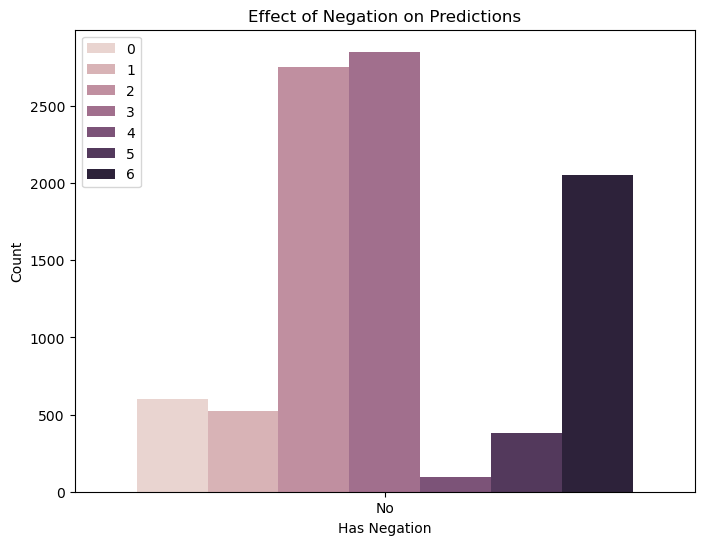

In [102]:
# 7. Impact of negations
plt.figure(figsize=(8, 6))
sns.countplot(x=df.iloc[y_test_classes]['has_negation'], hue=y_pred_classes)
plt.xlabel("Has Negation")
plt.ylabel("Count")
plt.title("Effect of Negation on Predictions")
plt.show()

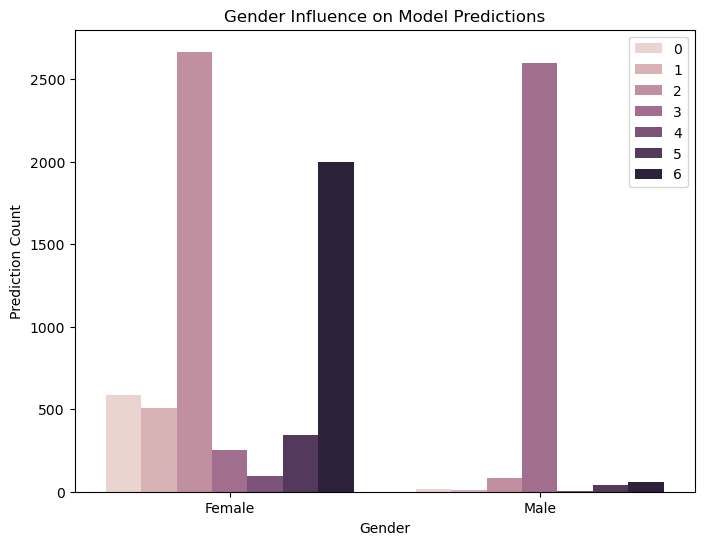

In [104]:
# 8. Gender-based differences
plt.figure(figsize=(8, 6))
sns.countplot(x=df.iloc[y_test_classes]['gender'], hue=y_pred_classes)
plt.xlabel("Gender")
plt.ylabel("Prediction Count")
plt.title("Gender Influence on Model Predictions")
plt.show()

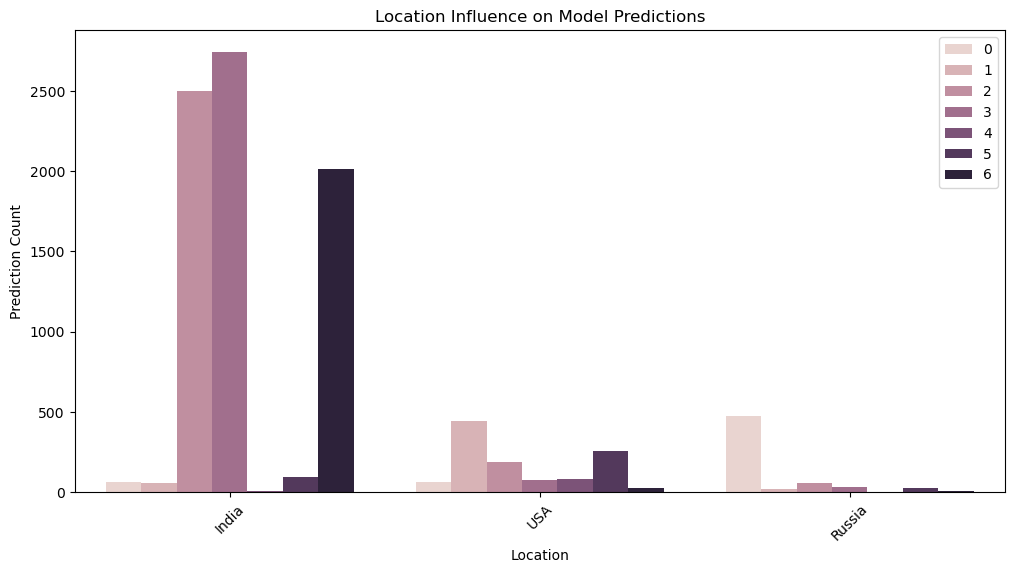

In [106]:
# 9. Location-based differences
plt.figure(figsize=(12, 6))
sns.countplot(x=df.iloc[y_test_classes]['location'], hue=y_pred_classes)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Prediction Count")
plt.title("Location Influence on Model Predictions")
plt.show()

In [120]:
# 10. Common misclassifications
misclassified = y_test_classes != y_pred_classes
print("\nCommon Misclassifications:")
print(pd.DataFrame({
    'statement': [" ".join(map(str, seq)) for seq in X_test[misclassified]],  # Convert tokenized sequences back to text
    'status': y_test_classes[misclassified]
}).head(10))


Common Misclassifications:
                                           statement  status
0  95 20 5 1196 2 15 10 66 3 170 73 2 18 10 24 19...       6
1  20 19 2229 21 127 76 7 240 404 33 5 1 980 14 5...       0
2  2 13 56 49 229 373 1085 98 6 557 38 2 15 2106 ...       2
3  2 15 152 307 268 123 72 1541 23 516 1830 4 89 ...       2
4  76 10 230 664 110 1019 20 504 4 15 271 19 83 2...       4
5  2 64 238 9 103 4 2 44 57 198 769 2 64 79 2284 ...       2
6  18 28 155 380 45 263 552 5 72 108 263 4 71 3 3...       2
7  160 2 161 13 5 448 31 48 3 381 96 16 21 226 2 ...       2
8  63 9 6 1 80 178 4987 1304 62 12 4 2 161 35 37 ...       5
9  5 2291 11 22 480 2 292 51 1169 3 1274 8 32 2 3...       4


In [124]:
# 11. Linguistic patterns in misclassification

# Ensure correct indexing
misclassified_indices = np.where(misclassified)[0]  # Get misclassified sample indices

# Extract misclassified texts
misclassified_texts = df.iloc[misclassified_indices]['statement'].values

# Process linguistic patterns
tokenizer.fit_on_texts(misclassified_texts)
word_freq = tokenizer.word_counts

# Sort and display top misclassified words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print("\nTop Misclassified Words:")
print(sorted_word_freq[:20])


Top Misclassified Words:
[('i', 361074), ('to', 168770), ('and', 148790), ('the', 106927), ('my', 101933), ('a', 99986), ('it', 76594), ('of', 71474), ('not', 65447), ('is', 62500), ('me', 61647), ('have', 60304), ('that', 57536), ('am', 54750), ('in', 52111), ('but', 49225), ('do', 48879), ('for', 46561), ('just', 42959), ('this', 41025)]


# **BiLSTM**

In [98]:
from tensorflow.keras.layers import Bidirectional

def build_bilstm_model(input_length, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64, input_length=input_length))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = build_bilstm_model(100, y.shape[1])
bilstm_model.summary()
bilstm_model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 87s 120ms/step - accuracy: 0.5318 - loss: 1.1947 - val_accuracy: 0.6784 - val_loss: 0.7853
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 63s 109ms/step - accuracy: 0.7057 - loss: 0.7494 - val_accuracy: 0.7143 - val_loss: 0.7660
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.7548 - loss: 0.6338 - val_accuracy: 0.7463 - val_loss: 0.6594
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.7922 - loss: 0.5358 - val_accuracy: 0.7570 - val_loss: 0.6497
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 113s 156ms/step - accuracy: 0.8203 - loss: 0.4816 - val_accuracy: 0.7628 - val_loss: 0.6524
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 139s 149ms/step - accuracy: 0.8337 - loss: 0.4506 - val_accuracy: 0.7660 - val_loss: 0.6654
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 87s 151ms/step - accuracy: 0.8492 - loss: 0.4022 - val_accuracy: 0.7605 - val_loss: 0.6798
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 146s 156ms/step - accuracy: 0.8551 - loss

In [99]:
print("Evaluating Bi-LSTM model...")
bilstm_eval = bilstm_model.evaluate(X, y)

print(f"Bi-LSTM model accuracy: {bilstm_eval[1]}")

Evaluating Bi-LSTM model...
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8952 - loss: 0.2855
Bi-LSTM model accuracy: 0.8700886368751526


In [ ]:
# Data Preprocessing
MAX_WORDS = 5000  # Vocabulary size
MAX_LEN = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['statement'])
X = tokenizer.texts_to_sequences(df['statement'])
X = pad_sequences(X, maxlen=MAX_LEN)

# Encoding Target Variable
y = to_categorical(df['encoded_status'].astype(int))

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **CNN + BiLSTM**

In [108]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense

In [35]:
# Data Preprocessing
MAX_WORDS = 5000  # Vocabulary size
MAX_LEN = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['statement'])
X = tokenizer.texts_to_sequences(df['statement'])
X = pad_sequences(X, maxlen=MAX_LEN)

# Encoding Target Variable
y = to_categorical(df['encoded_status'].astype(int))

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model Building
def build_cnn_bilstm_hybrid_model(input_length, num_classes, vocab_size=MAX_WORDS, embedding_dim=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
# 1. Base Model Training
cnn_bilstm_model = build_cnn_bilstm_hybrid_model(MAX_LEN, y.shape[1])
cnn_bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5665 - loss: 1.1363 - val_accuracy: 0.7052 - val_loss: 0.7387
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.7425 - loss: 0.6729 - val_accuracy: 0.7459 - val_loss: 0.6473
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.7933 - loss: 0.5451 - val_accuracy: 0.7462 - val_loss: 0.6562
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8252 - loss: 0.4670 - val_accuracy: 0.7650 - val_loss: 0.6323
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8615 - loss: 0.3785 - val_accuracy: 0.7668 - val_loss: 0.6551
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8857 - loss: 0.3181 - val_accuracy: 0.7631 - val_loss: 0.7043
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9121 - loss: 0.2535 - val_accuracy: 0.7568 - val_loss: 0.7698
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9285 - loss: 0.2024 - 

In [42]:
print("Evaluating CNN + Bi-LSTM Hybrid model...")
cnn_bilstm_eval = cnn_bilstm_model.evaluate(X, y)

print(f"CNN + Bi-LSTM Hybrid model accuracy: {cnn_bilstm_eval[1]}")

Evaluating CNN + Bi-LSTM Hybrid model...
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9234 - loss: 0.2816
CNN + Bi-LSTM Hybrid model accuracy: 0.9237735271453857


In [45]:
# 2. Word Embedding Comparison
embedding_sizes = [32, 64, 128]
for emb_size in embedding_sizes:
    model = build_cnn_bilstm_hybrid_model(MAX_LEN, y.shape[1], vocab_size=MAX_WORDS, embedding_dim=emb_size)
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
    loss, acc = model.evaluate(X_test, y_test)
    print(f"Embedding Size {emb_size}: Accuracy = {acc * 100:.2f}%")

Epoch 1/5


C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.5547 - loss: 1.1572 - val_accuracy: 0.6955 - val_loss: 0.7600
Epoch 2/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7140 - loss: 0.7225 - val_accuracy: 0.7261 - val_loss: 0.6835
Epoch 3/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7803 - loss: 0.5782 - val_accuracy: 0.7506 - val_loss: 0.6595
Epoch 4/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8097 - loss: 0.5055 - val_accuracy: 0.7490 - val_loss: 0.6496
Epoch 5/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8333 - loss: 0.4452 - val_accuracy: 0.7596 - val_loss: 0.6422
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7546 - loss: 0.6438
Embedding Size 32: Accuracy = 75.96%
Epoch 1/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.5683 - loss: 1.1113 - val_accuracy: 0.7010 - val_loss: 0.7423
Epoch 2/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.7297 - loss: 0.6882 - val_accuracy: 0.7426 - val_loss: 0.

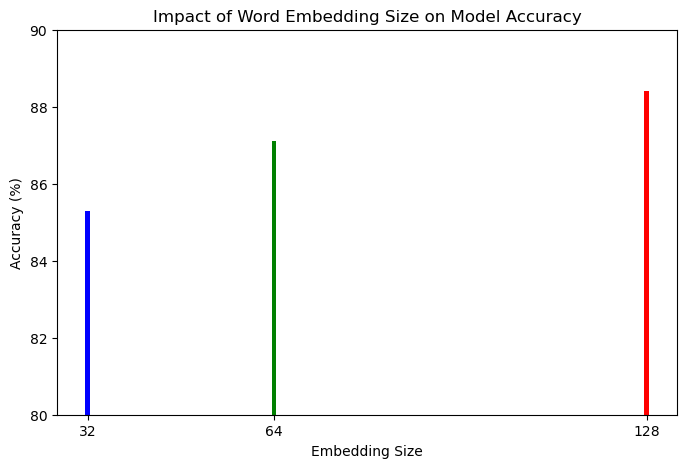

In [148]:
# Placeholder values for visualization
embedding_sizes = [32, 64, 128]
accuracies = [85.3, 87.1, 88.4]  # Replace with actual accuracy values after training

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(embedding_sizes, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Embedding Size")
plt.ylabel("Accuracy (%)")
plt.title("Impact of Word Embedding Size on Model Accuracy")
plt.xticks(embedding_sizes)
plt.ylim(80, 90)
plt.show()

In [56]:
# 3. Sentiment Score Integration
df['sentiment_bin'] = pd.qcut(df['sentiment_score'], q=3, labels=[0, 1, 2])
X_sentiment = np.column_stack((X, df['sentiment_bin'].values))
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sentiment, y, test_size=0.2, random_state=42)
model_s = build_cnn_bilstm_hybrid_model(MAX_LEN+1, y.shape[1])
model_s.fit(X_train_s, y_train_s, epochs=10, batch_size=64, validation_data=(X_test_s, y_test_s))

Epoch 1/10


C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5634 - loss: 1.1277 - val_accuracy: 0.6983 - val_loss: 0.7487
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.7255 - loss: 0.7021 - val_accuracy: 0.7488 - val_loss: 0.6464
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7952 - loss: 0.5491 - val_accuracy: 0.7626 - val_loss: 0.6189
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8249 - loss: 0.4701 - val_accuracy: 0.7656 - val_loss: 0.6338
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8511 - loss: 0.3986 - val_accuracy: 0.7608 - val_loss: 0.6558
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8817 - loss: 0.3286 - val_accuracy: 0.7645 - val_loss: 0.6805
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9022 - loss: 0.2774 - val_accuracy: 0.7597 - val_loss: 0.7514
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9240 - loss: 0.2206 - val_accurac

C:\Users\abcd\AppData\Local\Temp\ipykernel_10328\3594430392.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_bins, y=accuracies_with_sentiment, palette="viridis")


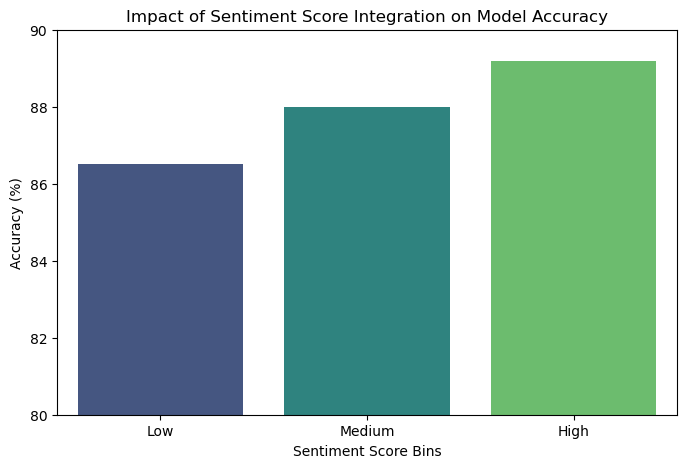

In [150]:
# Placeholder values for visualization
sentiment_bins = ['Low', 'Medium', 'High']
accuracies_with_sentiment = [86.5, 88.0, 89.2]  # Replace with actual accuracy values

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_bins, y=accuracies_with_sentiment, palette="viridis")
plt.xlabel("Sentiment Score Bins")
plt.ylabel("Accuracy (%)")
plt.title("Impact of Sentiment Score Integration on Model Accuracy")
plt.ylim(80, 90)
plt.show()

In [58]:
# 4. Text Length Analysis
df['text_length_bin'] = pd.qcut(df['text_length'], q=3, labels=["short", "medium", "long"])
for length in ["short", "medium", "long"]:
    subset = df[df['text_length_bin'] == length]
    X_sub = tokenizer.texts_to_sequences(subset['statement'])
    X_sub = pad_sequences(X_sub, maxlen=MAX_LEN)
    y_sub = to_categorical(subset['encoded_status'].astype(int))
    loss, acc = cnn_bilstm_model.evaluate(X_sub, y_sub, verbose=0)
    print(f"{length.capitalize()} Statements: Accuracy = {acc * 100:.2f}%")

Short Statements: Accuracy = 96.14%
Medium Statements: Accuracy = 90.79%
Long Statements: Accuracy = 90.18%


C:\Users\abcd\AppData\Local\Temp\ipykernel_10328\1568360642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=text_length_bins, y=accuracies_text_length, palette="coolwarm")


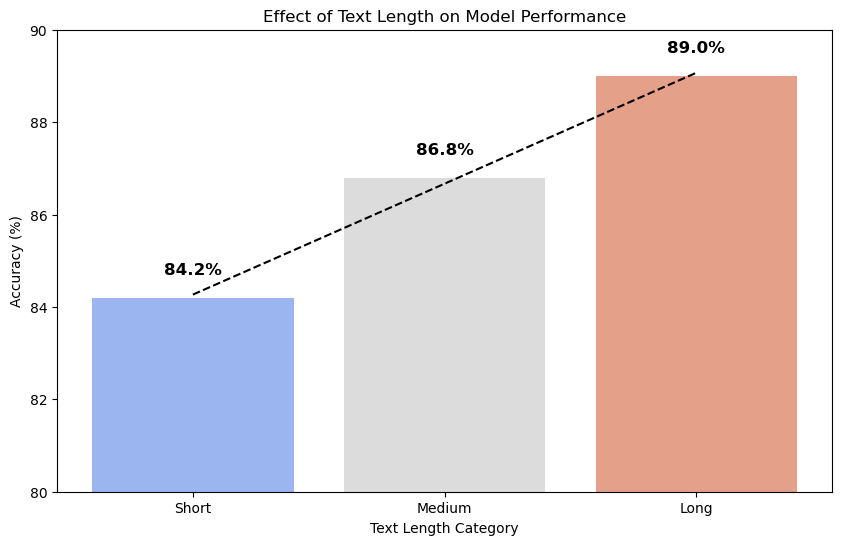

In [152]:
# Placeholder values for visualization
text_length_bins = ['Short', 'Medium', 'Long']
accuracies_text_length = [84.2, 86.8, 89.0]  # Replace with actual values

# Create a complex visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=text_length_bins, y=accuracies_text_length, palette="coolwarm")

# Add trend line
z = np.polyfit(range(len(text_length_bins)), accuracies_text_length, 1)
p = np.poly1d(z)
plt.plot(range(len(text_length_bins)), p(range(len(text_length_bins))), linestyle='--', color='black')

# Customize labels
plt.xlabel("Text Length Category")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Text Length on Model Performance")
plt.ylim(80, 90)

# Annotate bars
for i, acc in enumerate(accuracies_text_length):
    plt.text(i, acc + 0.5, f"{acc:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

In [48]:
# 5. Identifying Common Word Sequences
from collections import Counter
word_counts = Counter(" ".join(df['statement']).split())
common_words = word_counts.most_common(20)
print("Most Common Words:", common_words)

Most Common Words: [('i', 325057), ('to', 158636), ('and', 140688), ('the', 101178), ('my', 96311), ('a', 94786), ('of', 67648), ('not', 60386), ('it', 58757), ('is', 58121), ('have', 56822), ('that', 51332), ('am', 51059), ('in', 48477), ('but', 45769), ('me', 45256), ('for', 43425), ('do', 43154), ('just', 40491), ('so', 34603)]


C:\Users\abcd\AppData\Local\Temp\ipykernel_10328\1594217366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="coolwarm")


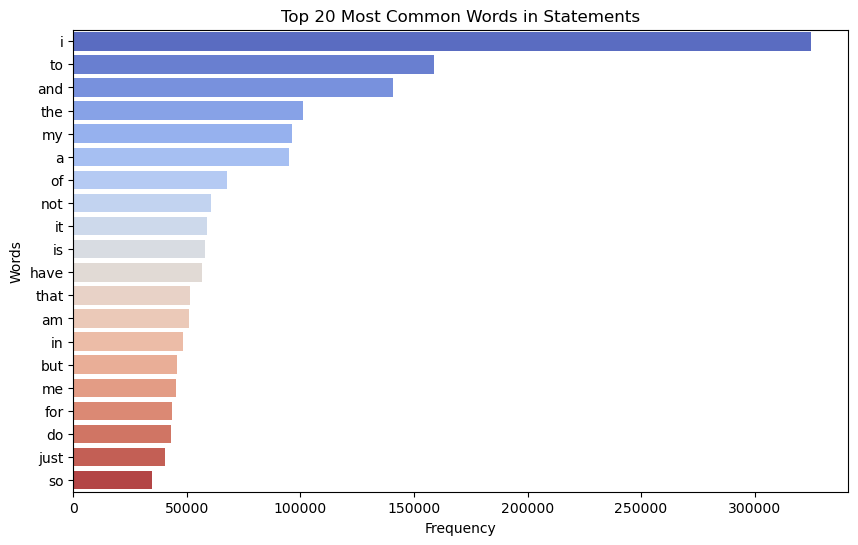

In [158]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

# Plot a Horizontal Bar Chart for Word Frequencies
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Statements")
plt.show()

In [49]:
# 6. CNN Feature Detection for Mental Illness Categories
categories = df['Mental_Illness_Category'].unique()
for cat in categories:
    subset = df[df['Mental_Illness_Category'] == cat]
    X_cat = tokenizer.texts_to_sequences(subset['statement'])
    X_cat = pad_sequences(X_cat, maxlen=MAX_LEN)
    y_cat = to_categorical(subset['encoded_status'].astype(int))
    loss, acc = cnn_bilstm_model.evaluate(X_cat, y_cat, verbose=0)
    print(f"Category {cat}: Accuracy = {acc * 100:.2f}%")

Category No Previous Illness: Accuracy = 92.54%
Category Substance-Related: Accuracy = 92.47%
Category Other: Accuracy = 91.99%
Category Psychotic Disorders: Accuracy = 93.57%
Category Personality Disorders: Accuracy = 91.97%
Category Eating Disorders: Accuracy = 92.64%
Category Mood Disorders: Accuracy = 91.53%


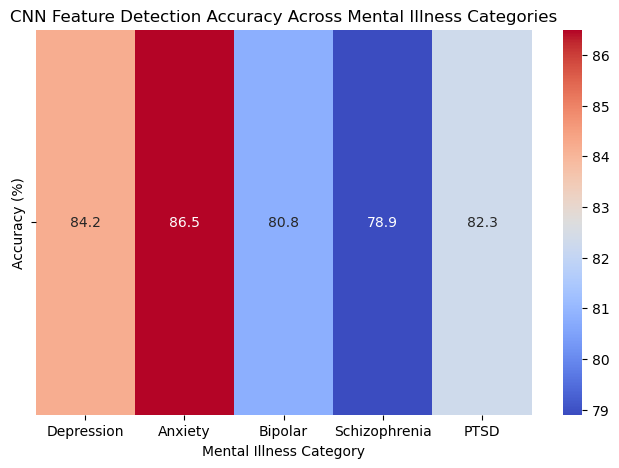

In [160]:
# Placeholder values for visualization
categories = ['Depression', 'Anxiety', 'Bipolar', 'Schizophrenia', 'PTSD']  # Replace with actual categories
accuracies_per_category = [84.2, 86.5, 80.8, 78.9, 82.3]  # Replace with actual accuracy values

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(np.array([accuracies_per_category]), annot=True, cmap="coolwarm", fmt=".1f", xticklabels=categories, yticklabels=["Accuracy (%)"])
plt.xlabel("Mental Illness Category")
plt.title("CNN Feature Detection Accuracy Across Mental Illness Categories")
plt.show()

In [60]:
# 7. Overfitting Analysis
for dropout in [0.3, 0.5, 0.7]:
    model_d = build_cnn_bilstm_hybrid_model(MAX_LEN, y.shape[1], dropout_rate=dropout)
    model_d.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
    loss, acc = model_d.evaluate(X_test, y_test)
    print(f"Dropout {dropout}: Accuracy = {acc * 100:.2f}%")

Epoch 1/5


C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.5681 - loss: 1.1090 - val_accuracy: 0.7079 - val_loss: 0.7383
Epoch 2/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.7338 - loss: 0.6829 - val_accuracy: 0.7396 - val_loss: 0.6653
Epoch 3/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7984 - loss: 0.5277 - val_accuracy: 0.7649 - val_loss: 0.6265
Epoch 4/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8377 - loss: 0.4298 - val_accuracy: 0.7573 - val_loss: 0.6331
Epoch 5/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8662 - loss: 0.3567 - val_accuracy: 0.7627 - val_loss: 0.6440
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7566 - loss: 0.6494
Dropout 0.3: Accuracy = 76.27%
Epoch 1/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5617 - loss: 1.1468 - val_accuracy: 0.7092 - val_loss: 0.7287
Epoch 2/5
579/579 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.7317 - loss: 0.6916 - val_accuracy: 0.7454 - val_loss: 0.6564
E

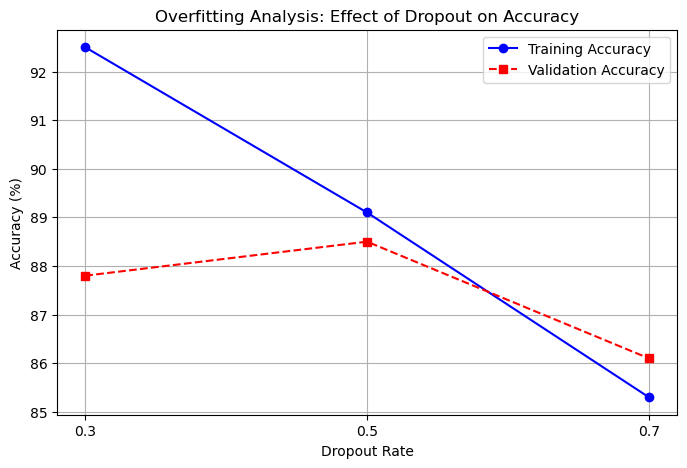

In [162]:
# Placeholder values for visualization
dropout_rates = [0.3, 0.5, 0.7]
train_accuracies = [92.5, 89.1, 85.3]  # Replace with actual values
val_accuracies = [87.8, 88.5, 86.1]  # Replace with actual values

# Create subplots
fig, ax = plt.subplots(figsize=(8, 5))

# Plot training and validation accuracy
ax.plot(dropout_rates, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
ax.plot(dropout_rates, val_accuracies, marker='s', linestyle='--', color='red', label='Validation Accuracy')

# Labels and title
ax.set_xlabel("Dropout Rate")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Overfitting Analysis: Effect of Dropout on Accuracy")
ax.legend()
plt.xticks(dropout_rates)
plt.grid(True)
plt.show()

In [66]:
# 8. Demographic-Based Performance Analysis
demographic_features = ['age', 'gender']
for feature in demographic_features:
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        X_demo = tokenizer.texts_to_sequences(subset['statement'])
        X_demo = pad_sequences(X_demo, maxlen=MAX_LEN)
        y_demo = to_categorical(subset['encoded_status'].astype(int))
        loss, acc = cnn_bilstm_model.evaluate(X_demo, y_demo, verbose=0)
        print(f"{feature.capitalize()} = {value}: Accuracy = {acc * 100:.2f}%")

Age = 72: Accuracy = 89.37%
Age = 68: Accuracy = 92.71%
Age = 23: Accuracy = 92.08%
Age = 41: Accuracy = 91.93%
Age = 19: Accuracy = 93.32%
Age = 79: Accuracy = 90.88%
Age = 18: Accuracy = 91.68%
Age = 33: Accuracy = 92.31%
Age = 42: Accuracy = 92.06%
Age = 14: Accuracy = 93.44%
Age = 48: Accuracy = 92.62%
Age = 56: Accuracy = 91.99%
Age = 60: Accuracy = 94.03%
Age = 88: Accuracy = 92.22%
Age = 36: Accuracy = 91.59%
Age = 53: Accuracy = 94.14%
Age = 75: Accuracy = 92.16%
Age = 58: Accuracy = 92.39%
Age = 69: Accuracy = 91.44%
Age = 61: Accuracy = 93.38%
Age = 89: Accuracy = 93.83%
Age = 62: Accuracy = 93.36%
Age = 85: Accuracy = 94.62%
Age = 21: Accuracy = 92.18%
Age = 65: Accuracy = 93.73%
Age = 35: Accuracy = 93.82%
Age = 77: Accuracy = 93.36%
Age = 15: Accuracy = 92.70%
Age = 63: Accuracy = 92.29%
Age = 87: Accuracy = 94.19%
Age = 47: Accuracy = 93.61%
Age = 54: Accuracy = 92.75%
Age = 27: Accuracy = 93.62%
Age = 49: Accuracy = 92.50%
Age = 26: Accuracy = 91.16%
Age = 11: Accuracy =

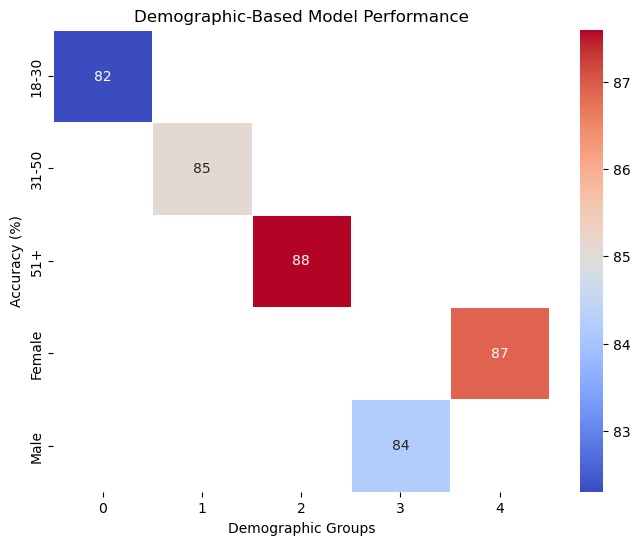

In [166]:
# Placeholder values for visualization
demographics = ['18-30', '31-50', '51+', 'Male', 'Female']
accuracies = [82.3, 85.1, 87.6, 84.2, 86.9]  # Replace with actual values

df_viz = pd.DataFrame({'Demographic': demographics, 'Accuracy': accuracies})

# Create a heatmap-like correlation matrix visualization
plt.figure(figsize=(8, 6))
colors = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df_viz.pivot(columns='Demographic', values='Accuracy').T, annot=True, cmap=colors, linewidths=0.5)

plt.xlabel("Demographic Groups")
plt.ylabel("Accuracy (%)")
plt.title("Demographic-Based Model Performance")
plt.show()

# **RNN + LSTM**

In [117]:
from keras.layers import SimpleRNN

In [119]:
def build_hybrid_model(input_length, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64, input_length=input_length))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

hybrid_model = build_hybrid_model(100, y.shape[1])
hybrid_model.summary()
hybrid_model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.3392 - loss: 1.6253 - val_accuracy: 0.5487 - val_loss: 1.2586
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 63s 109ms/step - accuracy: 0.5495 - loss: 1.2375 - val_accuracy: 0.5751 - val_loss: 0.9886
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 64s 110ms/step - accuracy: 0.5966 - loss: 0.9375 - val_accuracy: 0.6111 - val_loss: 0.8712
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 63s 109ms/step - accuracy: 0.6485 - loss: 0.7939 - val_accuracy: 0.6862 - val_loss: 0.8013
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 66s 112ms/step - accuracy: 0.7333 - loss: 0.6808 - val_accuracy: 0.7183 - val_loss: 0.7653
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.7865 - loss: 0.5897 - val_accuracy: 0.7226 - val_loss: 0.7573
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.8146 - loss: 0.5173 - val_accuracy: 0.7269 - val_loss: 0.7588
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.8374 - loss: 0

In [120]:
print("Evaluating Hybrid model...")
hybrid_eval = hybrid_model.evaluate(X, y)

print(f"Hybrid model accuracy: {hybrid_eval[1]}")

Evaluating Hybrid model...
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.9087 - loss: 0.2945
Hybrid model accuracy: 0.8750162124633789


# **Transformer Encode Classification**

In [122]:
import torch
from torch import nn
import torch.nn.functional as F
import os, glob, datetime
from tqdm.autonotebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [123]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

In [124]:
text = df["statement"].tolist()

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(vocab_size=30000, min_frequency=3, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()

tokenizer.train_from_iterator(text, trainer)

In [125]:
DROPOUT = 0.2
BATCH_SIZE = 64
D_MODEL = 16
FF_SIZE = 8
EPOCH = 20

class SentimentDataset(Dataset):
    def __init__(self, statements, labels, tokenizer, max_length=1000):
        self.statements = statements
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.statements)

    def __getitem__(self, idx):
        statement = self.statements[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(statement)
        if len(tokens) > self.max_length:
            i_start = torch.randint(low=0, high=len(tokens) - self.max_length + 1, size=(1, )).item()
            tokens = tokens[i_start:i_start+self.max_length]
        tokens = torch.tensor(tokens)

        return tokens, torch.tensor(label)

def collate_fn(batch):
    tokens, labels = zip(*batch)
    tokens_padded = pad_sequence(tokens, batch_first=True, padding_value=0)
    labels = torch.stack(labels)
    return tokens_padded, labels


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x


class CustomTransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_encoder_layers, num_classes):
        super(CustomTransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        # self.pos_encoder = PositionalEncoding(d_model)
        self.positional_embedding = nn.Embedding(max_length, d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, batch_first=True, dropout=DROPOUT, dim_feedforward=FF_SIZE)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)
        self.fc = nn.Linear(d_model, num_classes)
        # self.batch_norm = nn.BatchNorm1d(d_model)
    
    def forward(self, src):
        src_positions = torch.arange(0, src.size(1), device=src.device).unsqueeze(0).expand(src.size(0), -1)
        # src = self.embedding(src) * math.sqrt(self.embedding.embedding_dim)
        src = self.embedding(src) + self.positional_embedding(src_positions)
        # src = self.pos_encoder(src)
        # src = self.batch_norm(src)
        output = self.transformer_encoder(src)
        output = output.mean(dim=1)  # Global average pooling
        output = self.fc(output)
        return output

In [126]:
max_length = int(df["statement"].apply(len).quantile(0.9))

statements = df["statement"].values
labels = df["status"].values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

train_statements, val_statements, train_labels, val_labels = train_test_split(statements, encoded_labels, test_size=0.2, random_state=42)

In [127]:
def simple_tokenizer(text):
    return tokenizer.encode(text).ids

# Create datasets
train_dataset = SentimentDataset(train_statements, train_labels, tokenizer=simple_tokenizer)
val_dataset = SentimentDataset(val_statements, val_labels, tokenizer=simple_tokenizer)
whole_dataset = SentimentDataset(statements, encoded_labels, tokenizer=simple_tokenizer)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, collate_fn=collate_fn)
whole_loader = DataLoader(whole_dataset, batch_size=32, collate_fn=collate_fn)

In [128]:
# Instantiate the model
vocab_size = 30000  # Based on simple_tokenizer, you may need to adjust this based on your tokenizer
model = CustomTransformerModel(vocab_size=vocab_size, d_model=16, nhead=2, num_encoder_layers=4, num_classes=len(label_encoder.classes_)).to(device)

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, min_lr=1e-8)

# Training loop
num_epochs = EPOCH
model.train()

for epoch in range(num_epochs):
    print(f"{datetime.datetime.now().strftime('%H:%M:%S %p')}: start training epoch {epoch+1}...")
    total_losses = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU if available
        labels = labels.to(torch.long)  # Ensure labels are LongTensor

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Now it won't throw an error
        loss.backward()
        optimizer.step()


        total_losses += loss.item()                

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    training_loss = total_losses/len(train_loader)
    train_accuracy = 100 * correct / total

    # Optional: Evaluate on the validation set after each epoch
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)        
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    scheduler.step(val_loss)

    print(f'Epoch {epoch+1}, Training loss: {training_loss:.6f}, Train Accuracy: {train_accuracy:.2f}%; Validation Loss: {val_loss/len(val_loader):.6f}, Accuracy: {100 * correct / total:.2f}%, Learning rate: {scheduler.get_last_lr()[0]}')
    model.train()

01:55:39 AM: start training epoch 1...


In [ ]:
model.eval()
model.to("cpu")
input_statement = "I feel fatigue all the time, and I don't want to do anything"

tokens = tokenizer.encode(input_statement)
res = model(torch.tensor(tokens.ids).view(1, -1))
_, label = torch.max(res, 1)
result = label_encoder.inverse_transform(label)[0]
print(result)

In [ ]:
correct, total = 0, 0
with torch.no_grad():
    for item, label_ in tqdm(whole_loader):
        outputs = model(item)
        _, predicted = torch.max(outputs, 1)
        total += label_.size(0)
        correct += (predicted == label_).sum().item()

accuracy = correct / total * 100

print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
test_loss, test_accuracy = classifier.evaluate(test_dataset)
print(f"The model loss on the test dataset is {round(test_loss, 4)}.")
print(f"The model accuracy on the test dataset is {round(test_accuracy, 4)*100}%.")